# Set-up

In [1]:
# API keys
publickey='ZuDTh48Wylj12kp07bEhi0XtvJoTTqAwTIPkHFJALtRb6IGLAYyhNm7NfFnOoNYx'
secret='fvCNpe2uBmR60D1Zph4AIFymorhgky5gzWkX0voNg1wktbApRXo6GX7GE8RC6ZOf'

In [2]:
# Import dependencies

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

# Authentication

In [3]:
client= Client(publickey,secret)

# Get Tickers

In [4]:
tickers=client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07523200'},
 {'symbol': 'LTCBTC', 'price': '0.00395200'},
 {'symbol': 'BNBBTC', 'price': '0.00899200'},
 {'symbol': 'NEOBTC', 'price': '0.00109700'},
 {'symbol': 'QTUMETH', 'price': '0.00391600'},
 {'symbol': 'EOSETH', 'price': '0.00138600'},
 {'symbol': 'SNTETH', 'price': '0.00002745'},
 {'symbol': 'BNTETH', 'price': '0.00118400'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00021700'},
 {'symbol': 'BNBETH', 'price': '0.11950000'},
 {'symbol': 'BTCUSDT', 'price': '46319.99000000'},
 {'symbol': 'ETHUSDT', 'price': '3484.94000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001799'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [5]:
tickers[0]

{'symbol': 'ETHBTC', 'price': '0.07523200'}

In [6]:
tickers[0]['symbol']

'ETHBTC'

In [7]:
data=pd.DataFrame(tickers)
data.head()

,symbol,price
0,ETHBTC,0.07523200
1,LTCBTC,0.00395200
2,BNBBTC,0.00899200
3,NEOBTC,0.00109700
4,QTUMETH,0.00391600


In [8]:
data.tail()

,symbol,price
1628,POLYUSDT,0.74670000
1629,IDEXUSDT,0.56703000
1630,VIDTUSDT,1.03110000
1631,SOLBIDR,2993020.00
1632,AXSBIDR,1022178.00


In [9]:
data.set_index('symbol',inplace=True)

In [10]:
data.head()

,price
symbol,
ETHBTC,0.07523200
LTCBTC,0.00395200
BNBBTC,0.00899200
NEOBTC,0.00109700
QTUMETH,0.00391600


In [11]:
float(data.loc['ETHBTC'])

0.075232

In [12]:
data.loc['ETHBTC']

price    0.07523200
Name: ETHBTC, dtype: object

# Get Depth of the market

In [13]:
depth=client.get_order_book(symbol='ETHBTC')
depth

{'lastUpdateId': 4064182003,
 'bids': [['0.07523200', '2.54610000'],
  ['0.07522800', '0.05760000'],
  ['0.07522700', '2.28760000'],
  ['0.07522600', '4.30430000'],
  ['0.07522100', '0.98080000'],
  ['0.07522000', '0.16280000'],
  ['0.07521200', '1.73240000'],
  ['0.07520500', '1.43470000'],
  ['0.07520300', '1.82040000'],
  ['0.07520200', '5.20000000'],
  ['0.07520100', '0.00480000'],
  ['0.07520000', '2.14790000'],
  ['0.07519800', '1.43980000'],
  ['0.07519700', '6.97600000'],
  ['0.07519600', '19.93000000'],
  ['0.07519400', '0.24070000'],
  ['0.07519300', '9.81050000'],
  ['0.07519100', '0.92240000'],
  ['0.07518800', '0.06000000'],
  ['0.07518700', '0.24680000'],
  ['0.07518600', '0.46290000'],
  ['0.07518500', '0.01280000'],
  ['0.07518400', '12.08820000'],
  ['0.07518100', '0.53820000'],
  ['0.07517600', '0.00450000'],
  ['0.07517200', '6.99020000'],
  ['0.07516900', '0.00200000'],
  ['0.07516700', '2.86890000'],
  ['0.07516600', '0.00200000'],
  ['0.07516500', '7.10760000'],
 

In [14]:
depth_data=pd.DataFrame(depth['asks'])
depth_data.columns=['Price', 'Volume']
depth_data.head()

,Price,Volume
0,0.07523300,11.36400000
1,0.07523700,0.02680000
2,0.07524200,1.90000000
3,0.07524300,0.00230000
4,0.07524800,0.12510000


# Get Historic Data

In [42]:
historical=client.get_historical_klines('ETHBTC',Client.KLINE_INTERVAL_1DAY,'1 Jan 2015')
historical_df=pd.DataFrame(historical)
historical_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


In [43]:
ColumnNames= ['Open Time','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume',
              'Number of Trades','Taker Buy Base Asset Volume',
            'Taker Buy Quote Asset Volume','Ignore']
historical_df.columns=ColumnNames
historical_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


In [44]:
historical_df.shape

(1519, 12)

In [45]:
historical_df.dtypes

Open Time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close Time                       int64
Quote Asset Volume              object
Number of Trades                 int64
Taker Buy Base Asset Volume     object
Taker Buy Quote Asset Volume    object
Ignore                          object
dtype: object

# Pre-process historical klines data

In [46]:
# Change times to date-time format
historical_df['Open Time']=pd.to_datetime(historical_df['Open Time']/1000,unit='s')
historical_df['Close Time']=pd.to_datetime(historical_df['Close Time']/1000,unit='s')

In [47]:
historical_df.dtypes

Open Time                       datetime64[ns]
Open                                    object
High                                    object
Low                                     object
Close                                   object
Volume                                  object
Close Time                      datetime64[ns]
Quote Asset Volume                      object
Number of Trades                         int64
Taker Buy Base Asset Volume             object
Taker Buy Quote Asset Volume            object
Ignore                                  object
dtype: object

In [48]:
# Strings to int
num_cols=['Open','High','Low','Close','Volume','Quote Asset Volume','Number of Trades','Taker Buy Base Asset Volume','Taker Buy Quote Asset Volume','Ignore']

In [49]:
historical_df[num_cols]=historical_df[num_cols].apply(pd.to_numeric,axis=1)


In [50]:
historical_df.dtypes

Open Time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close Time                      datetime64[ns]
Quote Asset Volume                     float64
Number of Trades                       float64
Taker Buy Base Asset Volume            float64
Taker Buy Quote Asset Volume           float64
Ignore                                 float64
dtype: object

In [53]:
historical_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
count,1519.000000,1519.000000,1519.000000,1519.000000,1.519000e+03,1519.000000,1.519000e+03,1519.000000,1519.000000,1519.000000
mean,0.042517,0.043645,0.041345,0.042513,2.106343e+05,8049.615427,1.940880e+05,105727.432848,4036.664933,13266.683242
std,0.021500,0.022243,0.020730,0.021494,1.437005e+05,6100.145225,1.381449e+05,71714.326273,2997.695944,51916.028608
min,0.016415,0.016560,0.016150,0.016415,1.942057e+03,170.238524,1.994000e+03,1076.405000,94.825272,0.000000
25%,0.026072,0.026727,0.025503,0.026066,1.202264e+05,4058.212132,1.089350e+05,60518.342500,2005.537483,0.000000
50%,0.033514,0.034260,0.032777,0.033512,1.757074e+05,6775.303830,1.561700e+05,89381.500000,3484.770680,0.000000
75%,0.060733,0.062482,0.059006,0.060715,2.692214e+05,9950.885625,2.372380e+05,136305.819500,5045.238651,0.000000
max,0.113075,0.123799,0.109343,0.113185,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271,498596.725953


In [54]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open Time                     1519 non-null   datetime64[ns]
 1   Open                          1519 non-null   float64       
 2   High                          1519 non-null   float64       
 3   Low                           1519 non-null   float64       
 4   Close                         1519 non-null   float64       
 5   Volume                        1519 non-null   float64       
 6   Close Time                    1519 non-null   datetime64[ns]
 7   Quote Asset Volume            1519 non-null   float64       
 8   Number of Trades              1519 non-null   float64       
 9   Taker Buy Base Asset Volume   1519 non-null   float64       
 10  Taker Buy Quote Asset Volume  1519 non-null   float64       
 11  Ignore                        

# Visualisation

In [55]:
# Import MPLfinance
import mplfinance as mpf

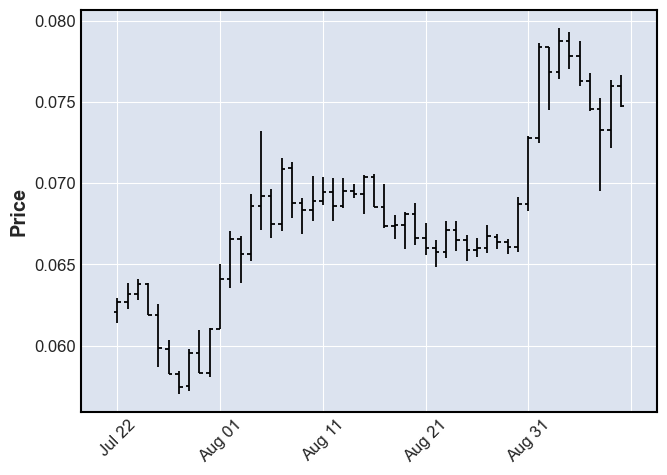

In [57]:
mpf.plot(historical_df.set_index('Close Time').tail(50))

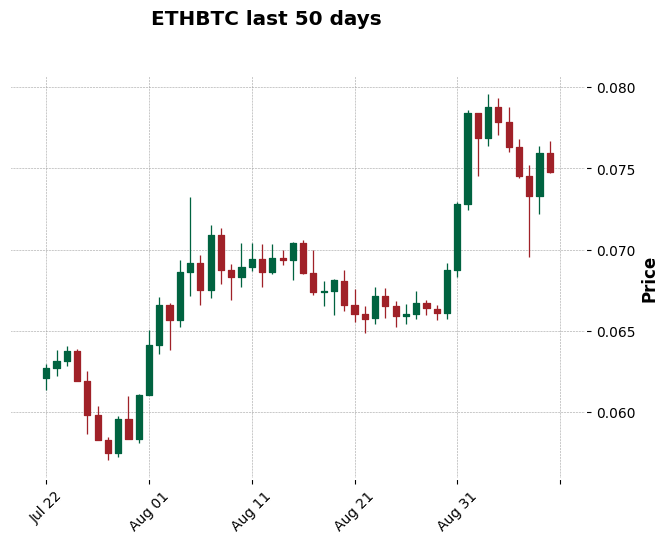

In [60]:
mpf.plot(historical_df.set_index('Close Time').tail(50),
        type='candle',style='charles',
        title='ETHBTC last 50 days')

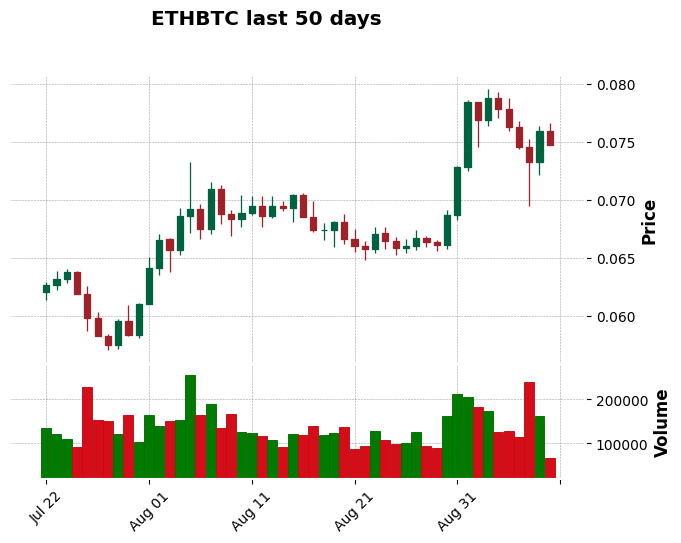

In [59]:
# Add Volume Data
mpf.plot(historical_df.set_index('Close Time').tail(50),
        type='candle',style='charles',
        volume=True,
        title='ETHBTC last 50 days')

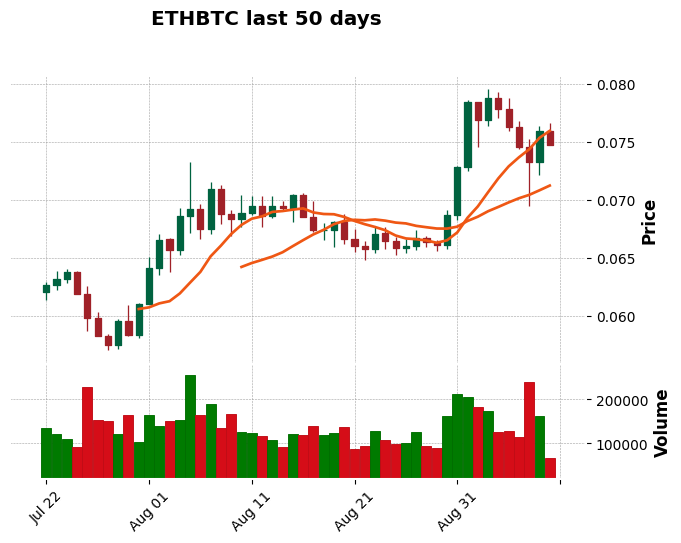

In [61]:
mpf.plot(historical_df.set_index('Close Time').tail(50),
        type='candle',style='charles',
        volume=True,
        title='ETHBTC last 50 days',
        mav=(10,20))